## Leaky tank

Recall the leaky tank presented in the lecture, now we use a linear model to represent it. 

![Alt text](leaky.png)

In this system, we will be modelling a continous time system and make the system discrete via sampelling, and design a PI controller to control the system, maintaining the height of the tank in a steady value.

At $t = 0$, the water level and therefore the pressure is at its highest, so the water drains most rapidly at t = 0. As the water drains and the level falls, the pressure and the rate of drainage also fall. This behavior is captured by the following differential equation:

$$

\begin{align*}
      \frac{dV}{dt} &= (F_{in} - F_{out}) \\
      h &= \frac{V}{A} \\
      F_{out} &= K\cdot h\\
\end{align*}
$$

In this lab, Area of the bottom $A=2$, $\alpha=20$, and $K=2$.


### Lab Tasks
1. Modelling the system by writng the defferential equations. Make the system discrete by sampling the height of the tank with the sampling time step $t_s=0.1s$, with the initial condition of $Fin=1$, $h=1$, output the result of constant input flow
2. Now we can add a PI controller for this leaky tank, you will be assigned with a random value when signing off with the TAs.

### Solution:

State $x = (h)$

Input $u = (F_{in})$

Output $y = (F_{out})$

$\frac{dx}{dt}=A'x+Bu \Leftrightarrow \frac{1}{A}\frac{dV}{dt} = - \frac{1}{A}F_{out} + \frac{1}{A}F_{in} = - \frac{1}{A}Kh + \frac{1}{A}F_{in} = - \frac{1}{A}Kx + \frac{1}{A}u \Rightarrow A' = (-\frac{K}{A}), B = (\frac{1}{A})$

$y=Cx + Du \Leftrightarrow F_{out} = Kh \Rightarrow C = (K), D = (0)$

In [68]:
class Model:
    def __init__(self, x_0, A, K) -> None:
        self.x = x_0
        self.y = 0
        self.t_last = 0
        self.A = -K / A
        self.B = 1 / A
        self.C = K
        self.D = 0

    def iterate(self, t, u):
        dt = t - self.t_last
        self.t_last = t
        dx_dt = self.A * self.x + self.B * u
        self.x += dx_dt * dt
        self.y = self.C * self.x + self.D * u

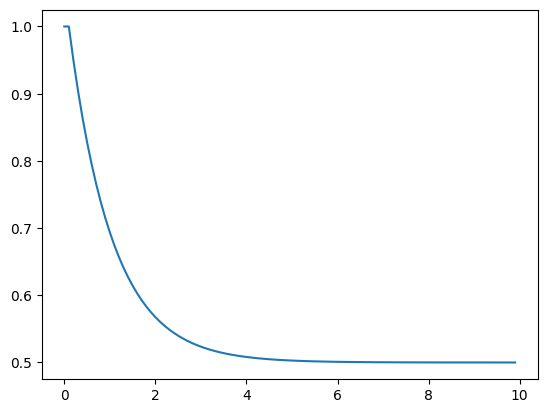

In [88]:
# Lab assignment 1
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t_0 = 0
t_end = 10
t_s = 0.1

# Init model
model = Model(x_0=1, A=2, K=2)

# Iterate over time
u = 1
x_values = []
y_values = []
for t in np.arange(t_0, t_end, t_s):
    x_values.append(t)
    y_values.append(model.x)
    model.iterate(t, u)

plt.plot(x_values, y_values)

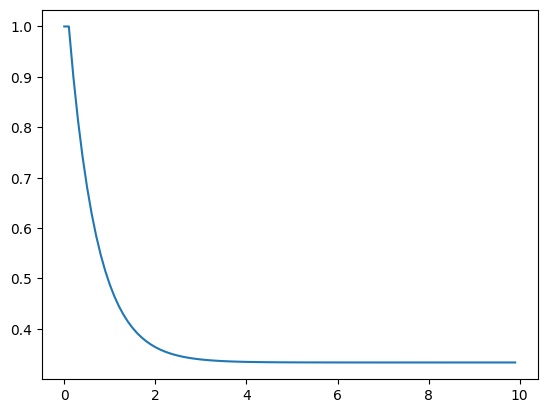

In [91]:
# Lab assignment 2

# Controller parameters
K_P = 1
K_I = 0

# Init model
model = Model(x_0=1, A=2, K=2)

# Iterate over time
r = model.x
e_acc = 0
x_values = []
y_values = []
for t in np.arange(t_0, t_end, t_s):
    x_values.append(t)
    y_values.append(model.x)
    e = r - model.x
    e_acc += e
    dt = t_s
    u = K_P * e + K_I * e_acc * dt
    model.iterate(t, u)

plt.plot(
    x_values,
    y_values,
    # marker="o"
)